# EDA Project - Rollercoaster Data Analysis
---
## Analysis of Rollercoaster Dataset by ROB MULLA, also followed his YouTube video to perform the analysis...


# Step 0: Import Dependencies and Read Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
rollercoaster_df = pd.read_csv('data/coaster_db.csv')

In [15]:
rollercoaster_df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


# Step 1: Data Understanding

In [16]:
rollercoaster_df.shape

(1087, 56)

In [17]:
rollercoaster_df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

# Step 2: Data Preperation

In [25]:
# Prepare new DataFrame with needed columns
data_df = rollercoaster_df[['coaster_name', 'Location', 'Status', 'Manufacturer', 
                            'year_introduced', 'latitude', 'longitude', 'Type_Main',
                            'opening_date_clean', 'speed_mph', 'height_ft',
                            'Inversions_clean', 'Gforce_clean']]

In [26]:
data_df.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [28]:
# Correct Data Types
pd.to_datetime(data_df['opening_date_clean'])

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

In [29]:
pd.to_numeric(data_df['year_introduced'])

0       1884
1       1895
2       1896
3       1901
4       1901
        ... 
1082    2022
1083    2022
1084    2022
1085    2022
1086    2022
Name: year_introduced, Length: 1087, dtype: int64

In [30]:
# Rename Columns
data_df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [38]:
data_df = data_df.rename(columns={'coaster_name':'Coaster_Name',
                                  'year_introduced':'Year_Introduced',
                                  'latitude':'Latitude',
                                  'longitude':'Longitude',
                                  'opening_date_clean':'Opening_Date',
                                  'speed_mph':'Speed_MPH',
                                  'height_ft':'Height_FT',
                                  'Inversions_clean':'Inversions',
                                  'Gforce_clean':'Gforce'})

In [39]:
data_df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_MPH          150
Height_FT          916
Inversions           0
Gforce             725
dtype: int64

In [40]:
data_df.loc[data_df.duplicated(subset = ['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_FT,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [41]:
data_df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_FT,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [44]:
data_df = data_df.loc[~data_df.duplicated(subset = ['Coaster_Name','Location','Opening_Date'])].reset_index(drop = True)

In [45]:
data_df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_FT,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [46]:
data_df.shape

(990, 13)

# Step 3: Feature Understanding

- Plotting:
    - Histogram
    - KDE
    - Boxplot

In [47]:
data_df['Year_Introduced'].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Coaster Count')

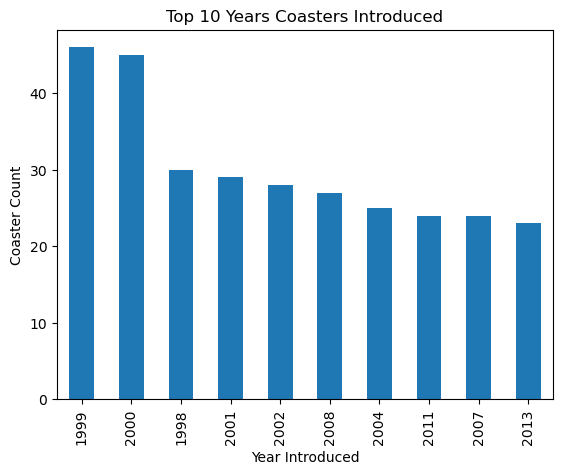

In [49]:
ax = data_df['Year_Introduced'].value_counts().head(10).plot(kind = 'bar', title = 'Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Coaster Count')

Text(0.5, 0, 'Speed (mph)')

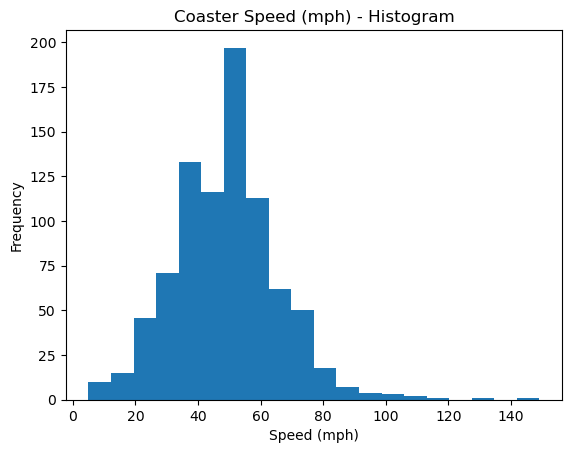

In [58]:
ax = data_df['Speed_MPH'].plot(kind = 'hist', bins = 20, title = 'Coaster Speed (mph) - Histogram')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

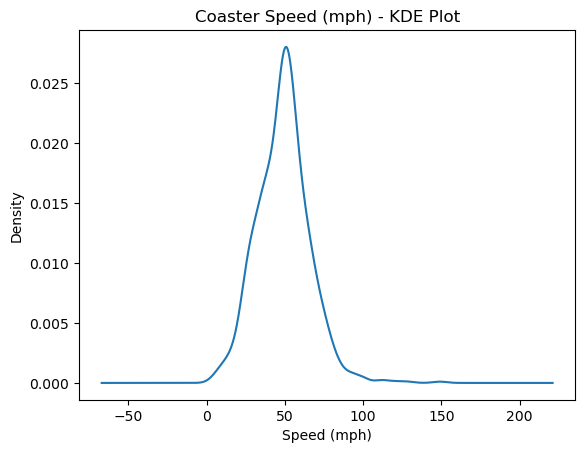

In [59]:
ax = data_df['Speed_MPH'].plot(kind = 'kde', title = 'Coaster Speed (mph) - KDE Plot')
ax.set_xlabel('Speed (mph)')

# Step 4: Feature Relationships

- Plotting:
    - Scatterplot
    - Heatmap Correlation
    - Pairplot
    - Groupby Comparisons

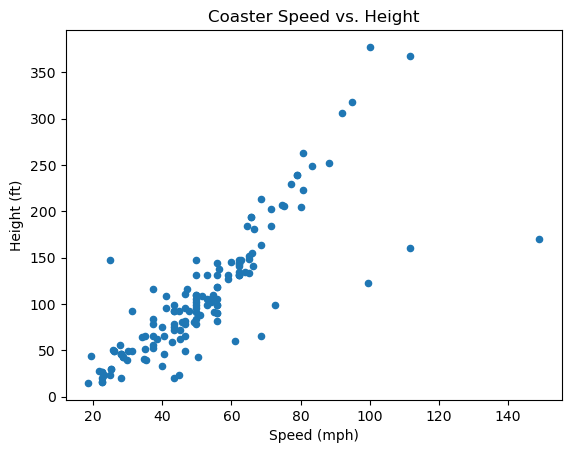

In [62]:
# Speed vs Height Scatter Plot (Pandas)
data_df.plot(kind = 'scatter', x = 'Speed_MPH', y = 'Height_FT', title = 'Coaster Speed vs. Height',
            xlabel = 'Speed (mph)', ylabel = 'Height (ft)')
plt.show()

<Axes: xlabel='Speed_MPH', ylabel='Height_FT'>

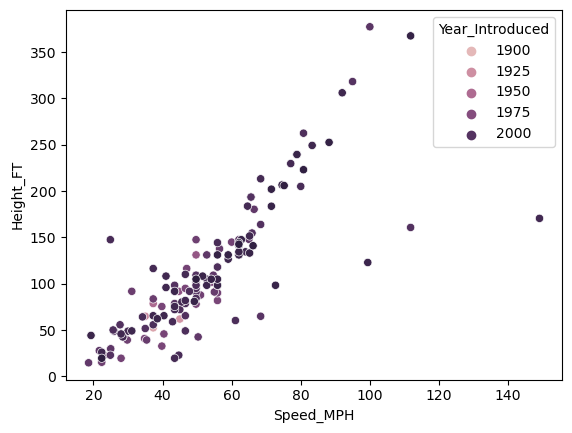

In [64]:
# Speed vs Height Scatter Plot (Seaborn) -> includes a 3rd Variable (Year Introduced)
sns.scatterplot(x = 'Speed_MPH', y = 'Height_FT', data = data_df,
                hue = 'Year_Introduced')

C:\Users\Mitchell\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


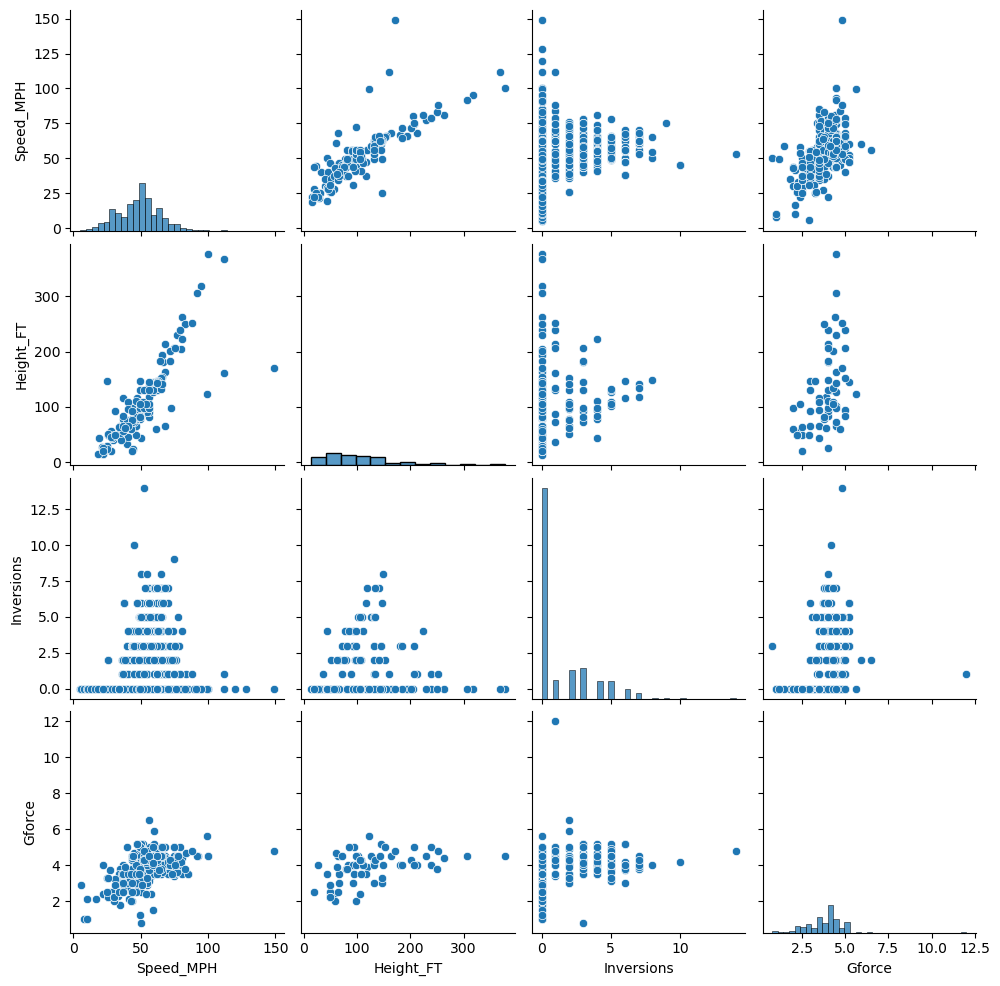

In [69]:
# Seaborn Pairplot -> used in this case to compare 4 varibles together
sns.pairplot(data_df, vars = ['Speed_MPH', 'Height_FT', 'Inversions', 'Gforce'])

In [71]:
corr_df = data_df[['Speed_MPH', 'Height_FT', 'Inversions', 'Gforce']].dropna().corr()
corr_df

,Speed_MPH,Height_FT,Inversions,Gforce
Speed_MPH,1.000000,0.733999,-0.028705,0.607383
Height_FT,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.607383,0.466482,0.275991,1.000000


<Axes: >

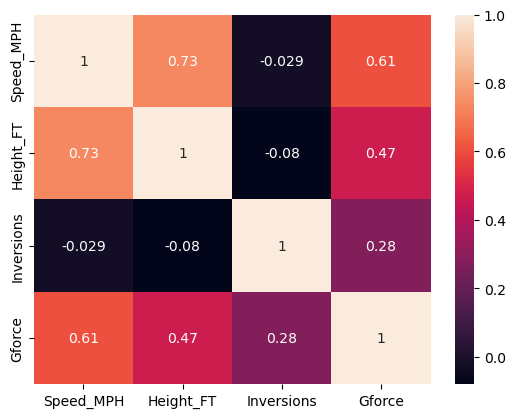

In [72]:
# Seaborn heatmap -> used to visualize correlation
sns.heatmap(corr_df, annot = True)

# Step 5: Ask a Question about the data

- Answer a question about the data using a plot or statistic

1. What are the locations with the fastest rollercoasters? (minimum of 10 coasters)

In [73]:
data_df['Location'].value_counts()

Location
Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: count, Length: 280, dtype: int64

In [80]:
# Remove "Other" Location values from the data
clean_data_df = data_df.query('Location != "Other"')

In [81]:
clean_data_df.groupby('Location')['Speed_MPH'].agg(['mean','count']).query('count >= 10').sort_values('mean')['mean']

Location
Alton Towers                  42.791667
Carowinds                     43.571429
Kings Island                  49.273684
Hersheypark                   50.576923
Kings Dominion                52.083333
Six Flags Great Adventure     53.036364
Canada's Wonderland           53.533333
Six Flags Magic Mountain      57.241176
Cedar Point                   57.833333
Busch Gardens Williamsburg    58.318182
Name: mean, dtype: float64

Text(0.5, 0, 'Average Coaster Speed')

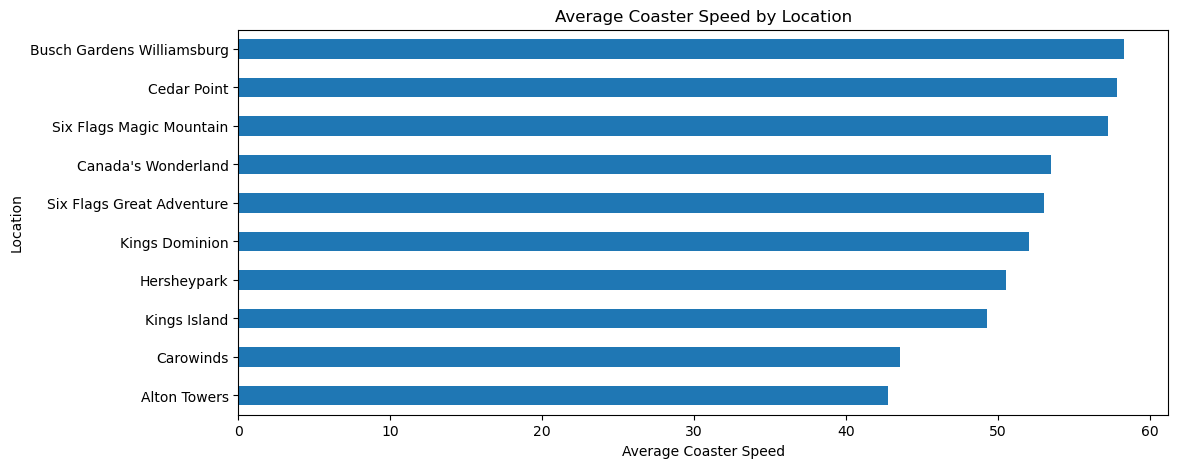

In [82]:
ax = clean_data_df.groupby('Location')['Speed_MPH'].agg(['mean','count']).query('count >= 10').sort_values('mean')['mean'].plot(
    kind = 'barh', figsize = (12,5), title = 'Average Coaster Speed by Location')
ax.set_xlabel('Average Coaster Speed')